In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
uber  = pd.read_csv("uber-raw-data-apr14.csv")

In [3]:
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'])

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null datetime64[ns]
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [7]:
uber['Weekday'] = uber['Date/Time'].dt.weekday_name

In [10]:
uber.head()

,Date/Time,Lat,Lon,Base,Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday


In [13]:
uber['Date'] = uber['Date/Time'].dt.day

In [15]:
uber.tail()

,Date/Time,Lat,Lon,Base,Weekday,Date
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,Wednesday,30


In [20]:
uber['Hour'] = uber['Date/Time'].dt.hour

In [21]:
uber.tail()

,Date/Time,Lat,Lon,Base,Weekday,Date,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,Wednesday,30,23


In [23]:
uber.rename(columns={'Date': 'Day'}, inplace = True)

In [24]:
uber.head()

,Date/Time,Lat,Lon,Base,Weekday,Day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,0


In [ ]:
#Starting with analysis

In [40]:
import matplotlib.pyplot as plt

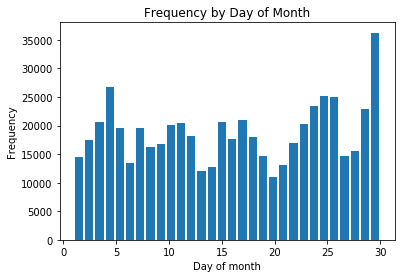

In [41]:
uber.Day.plot(kind = 'hist',bins = 30,rwidth = 0.8,title = 'Frequency by Day of Month')
plt.xlabel("Day of month")
plt.ylabel("Frequency")
plt.show()

In [32]:
uber.Day.value_counts().head(3)

30    36251
4     26714
25    25095
Name: Day, dtype: int64

In [42]:
#Analysis by hour

Text(0.5, 1.0, 'Frequency by Hour')

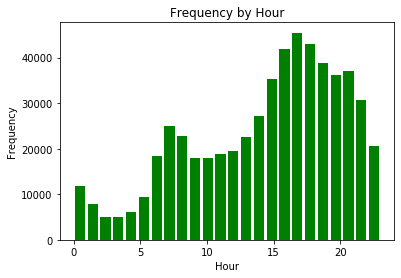

In [50]:
plt.hist(uber.Hour,bins = 24,rwidth = 0.8, color='Green')
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Frequency by Hour")

In [ ]:
#Analysing week day 

In [59]:
uber.Weekday.value_counts()

Wednesday    108631
Tuesday       91185
Friday        90303
Thursday      85067
Saturday      77218
Monday        60861
Sunday        51251
Name: Weekday, dtype: int64

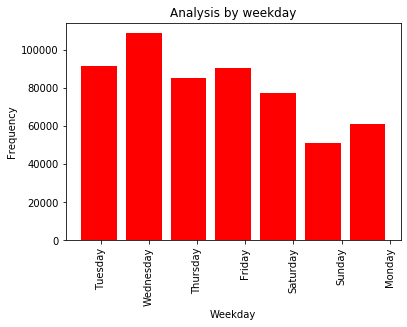

In [86]:
plt.hist(uber.Weekday, bins = 7, rwidth = 0.8,color='red', range=(-0.5,6))
plt.xticks(rotation = 90)
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.title("Analysis by weekday")
plt.show()

In [102]:
#For ubers to focus on which more locations

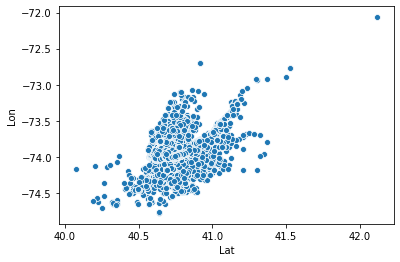

In [101]:
sns.scatterplot(x = 'Lat', y = 'Lon', data = uber)